<a href="https://colab.research.google.com/github/johnsonadam187/scikit_ml_projects/blob/main/housing_data_multiple_regr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Download and import data for california house prices.We will download a file stored at a Kaggle. First we have to create an auth token to Kaggle and store it in a folder on gdrive. Then we create an environment object and navigate to the kaggle.json auth token.

---



In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = "/content/gdrive/MyDrive/ML Datasets/Kaggle"

In [4]:
!cd "/content/gdrive/MyDrive/ML Datasets/Kaggle"

Check whats in the directory

In [5]:
!dir

gdrive	sample_data


Next we need to get the API command from the specific dataset

In [6]:
!kaggle datasets download -d camnugent/california-housing-prices


  0% 0.00/400k [00:00<?, ?B/s]
100% 400k/400k [00:00<00:00, 60.4MB/s]


We will create a separate folder to extract the files from the zip folder, and move the folder into it.

In [7]:
!mkdir "/content/gdrive/MyDrive/ML Datasets/Kaggle/California_Housing"

mkdir: cannot create directory ‘/content/gdrive/MyDrive/ML Datasets/Kaggle/California_Housing’: File exists


In [8]:
!mv /content/california-housing-prices.zip "/content/gdrive/MyDrive/ML Datasets/Kaggle/California_Housing"

In [9]:
!cd "/content/gdrive/MyDrive/ML Datasets/Kaggle/California_Housing/"

In [10]:
!unzip '/content/gdrive/MyDrive/ML Datasets/Kaggle/California_Housing/california-housing-prices.zip'

Archive:  /content/gdrive/MyDrive/ML Datasets/Kaggle/California_Housing/california-housing-prices.zip
  inflating: housing.csv             


In [11]:
!mv housing.csv "/content/gdrive/MyDrive/ML Datasets/Kaggle/California_Housing/"

In [12]:
%cd "/content/gdrive/MyDrive/ML Datasets/Kaggle/California_Housing/"


/content/gdrive/MyDrive/ML Datasets/Kaggle/California_Housing


In [13]:
!dir

california-housing-prices.zip  housing.csv


Examine the data

In [14]:
df1 = pd.read_csv("/content/gdrive/MyDrive/ML Datasets/Kaggle/California_Housing/housing.csv")
df1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [15]:
df1.shape

(20640, 10)

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


We have a categorical column "ocean_proximity". We must encode as numerical.

In [17]:
df1 = pd.get_dummies(data=df1, columns=["ocean_proximity"])
df1.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0


In [18]:
df1.shape

(20640, 14)

Total bedrooms column is missing some values, we can investigate the data further with .describe()

In [19]:
df1.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,0.442636,0.317393,0.000242,0.110950,0.128779
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,0.496710,0.465473,0.015563,0.314077,0.334963
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We have to decide how to deal with the missing data. Luckily pandas has a fillna value. Since total_bedrooms should be an integer value (as you cant have a decimal amoutn of rooms), we will fill the blank values with the median value for that metric. First we will print out the unique values by using the value_counts() function. This can also be done by casting the Series object to a set.

In [20]:
median_bedrooms = df1['total_bedrooms'].value_counts().median()
median_bedrooms

5.0

In [21]:
df1["total_bedrooms"].fillna(median_bedrooms, inplace=True)

Now check the info again to make sure the values were filled

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20640 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity_<1H OCEAN   20640 non-null  uint8  
 10  ocean_proximity_INLAND      20640 non-null  uint8  
 11  ocean_proximity_ISLAND      20640 non-null  uint8  
 12  ocean_proximity_NEAR BAY    20640 non-null  uint8  
 13  ocean_proximity_NEAR OCEAN  206

Now we can start to visualise the data. Pandas has a useful df.plot function that uses matplotlib to plot all the data within a dataframe. But first we will separate the feature data from the target data "median_house_value".

In [23]:
target = df1.pop('median_house_value')

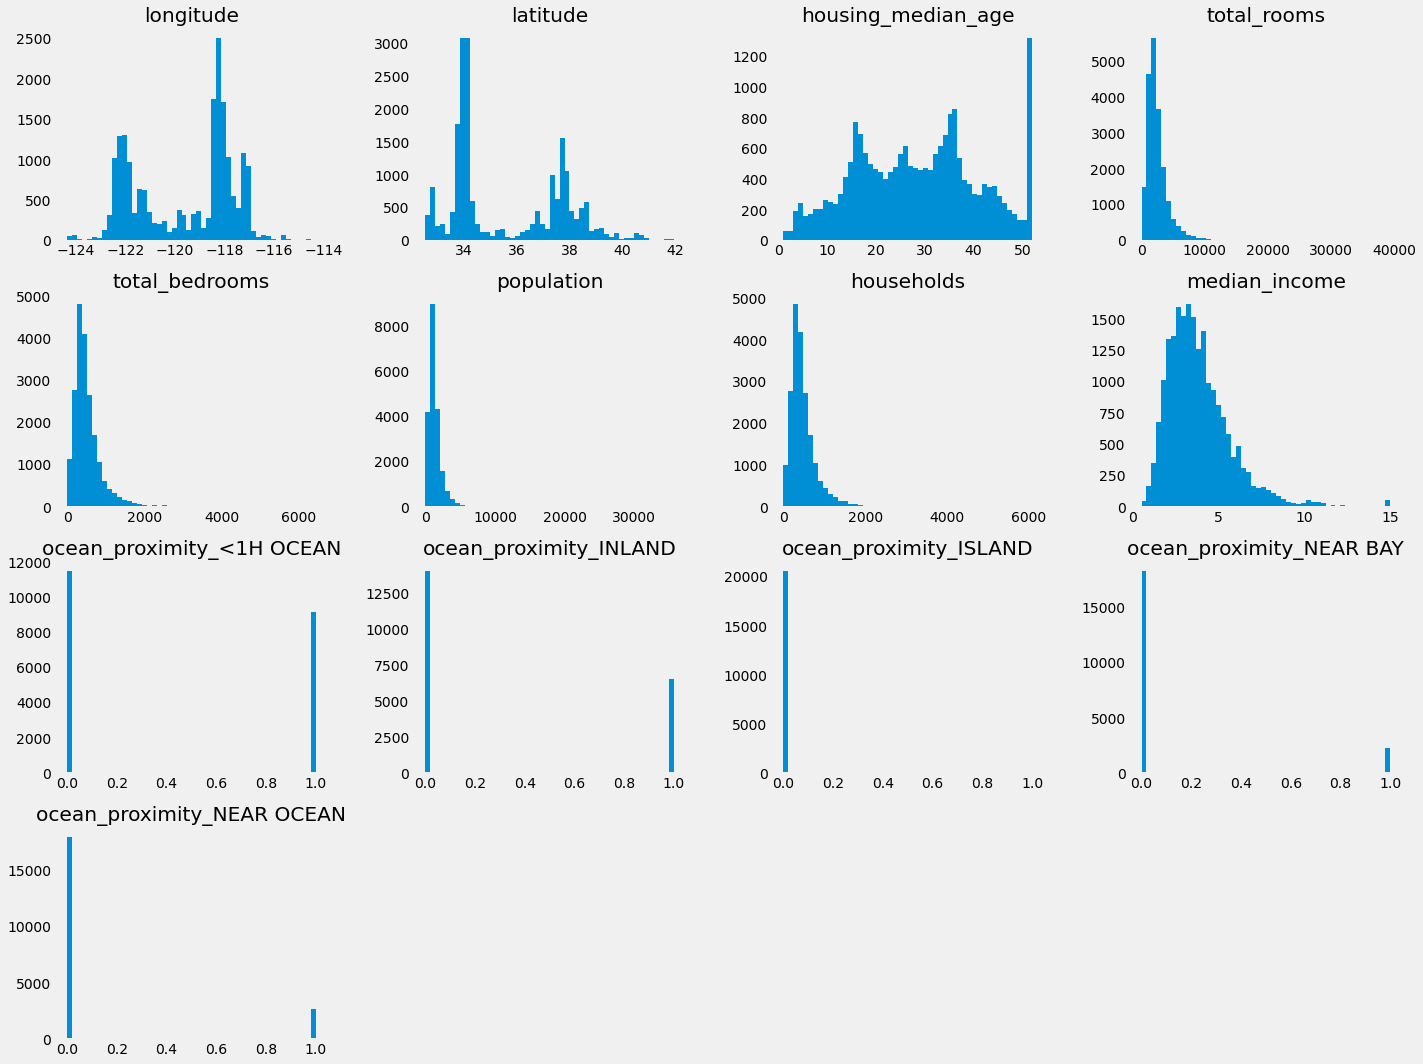

In [24]:
%matplotlib inline
plt.style.use('fivethirtyeight')
df1.hist(bins=50, figsize=(20, 15), grid=False)  #.hist() is the method of applying .plot(kind='hist)
plt.tight_layout()
plt.show()

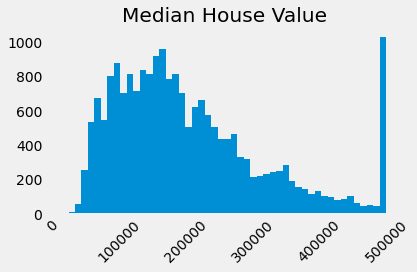

In [25]:
fig_price = target.hist(bins=50, grid=False, xrot=45)
fig_price.set_title("Median House Value")
plt.tight_layout()
plt.show()

So by looking at the data it looks like there are potential issues. Housing prices above 500,000 seem to be lumped together as 500,000. So any model created from this will only ever predict up to 500,000. It will be best to remove these values, unless we can get the actual values for these houses. So we will have to concatenate the features and the target, and filter the results by median house value == 500,000. Also the median housing age is capped at 52, and median income is capped at 15. We can remove them all at once

In [26]:
df1 = pd.concat([df1, target], axis=1, sort=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20640 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   ocean_proximity_<1H OCEAN   20640 non-null  uint8  
 9   ocean_proximity_INLAND      20640 non-null  uint8  
 10  ocean_proximity_ISLAND      20640 non-null  uint8  
 11  ocean_proximity_NEAR BAY    20640 non-null  uint8  
 12  ocean_proximity_NEAR OCEAN  20640 non-null  uint8  
 13  median_house_value          206

In [27]:
df1 = df1[df1["median_house_value"]<500000]
df1 = df1[df1["median_income"]<15]
df1 = df1[df1['housing_median_age']<52]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18553 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   18553 non-null  float64
 1   latitude                    18553 non-null  float64
 2   housing_median_age          18553 non-null  float64
 3   total_rooms                 18553 non-null  float64
 4   total_bedrooms              18553 non-null  float64
 5   population                  18553 non-null  float64
 6   households                  18553 non-null  float64
 7   median_income               18553 non-null  float64
 8   ocean_proximity_<1H OCEAN   18553 non-null  uint8  
 9   ocean_proximity_INLAND      18553 non-null  uint8  
 10  ocean_proximity_ISLAND      18553 non-null  uint8  
 11  ocean_proximity_NEAR BAY    18553 non-null  uint8  
 12  ocean_proximity_NEAR OCEAN  18553 non-null  uint8  
 13  median_house_value          185

re-visualise the data and then split the data again.

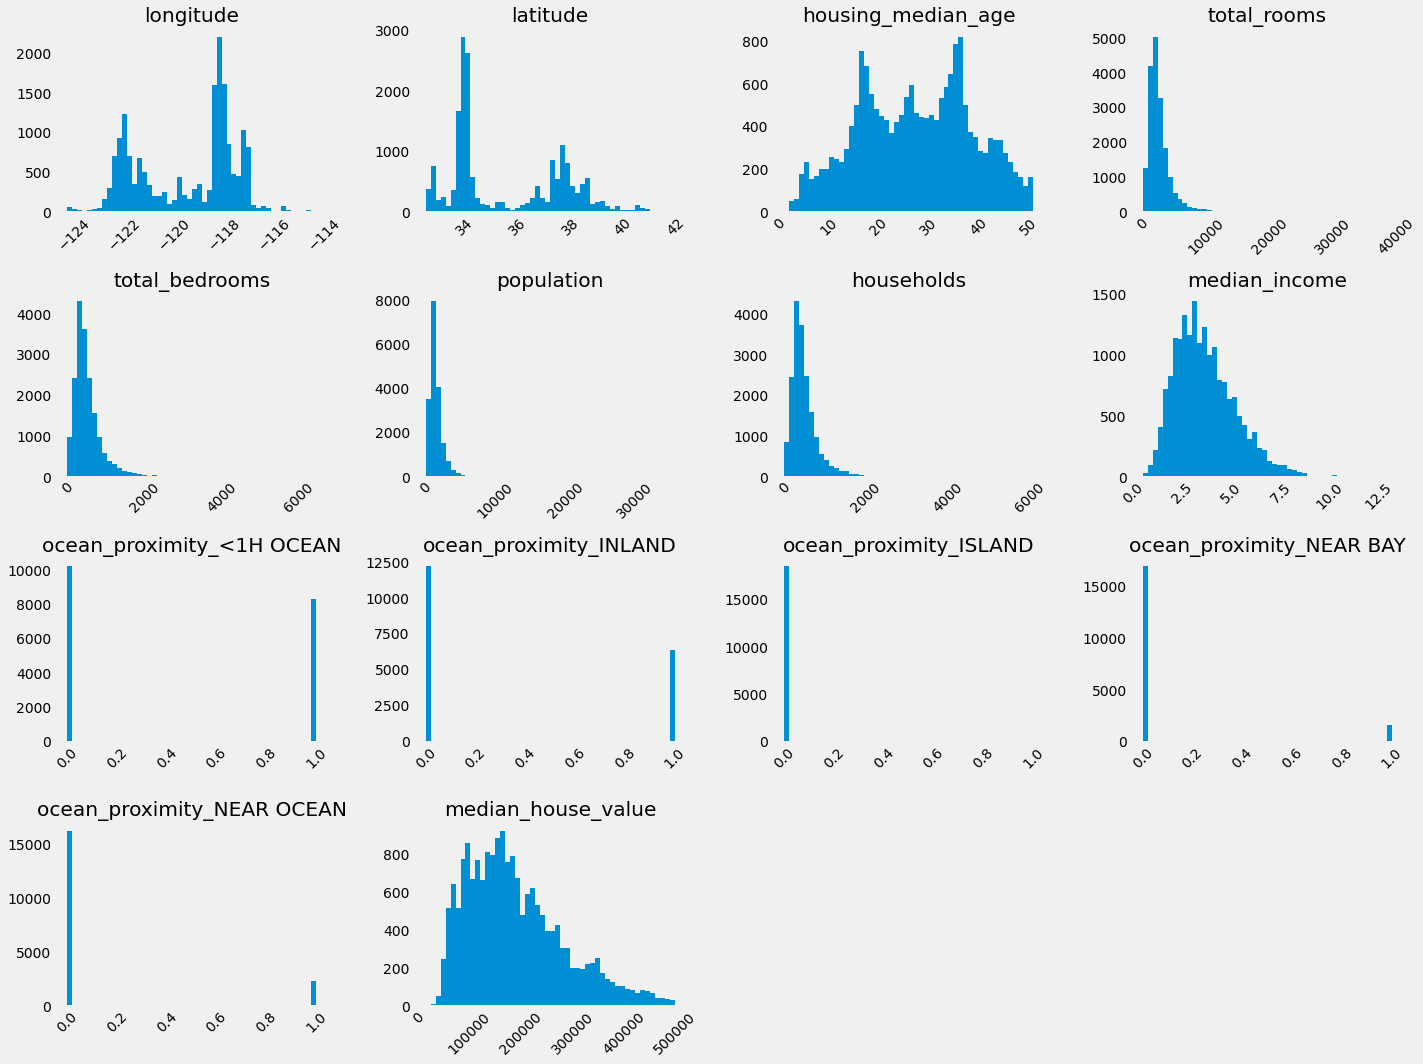

In [28]:
df1.hist(bins=50, figsize=(20, 15), grid=False, xrot=45)  #.hist() is the method of applying .plot(kind='hist)
plt.tight_layout()
plt.show()

These values are wildly different and many of the are integer values, so i will choose not to scale values. Also scaling longitude and latitude doesn't really make sense. Now we can look for visual correlations using seaborns built in pairplot function.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


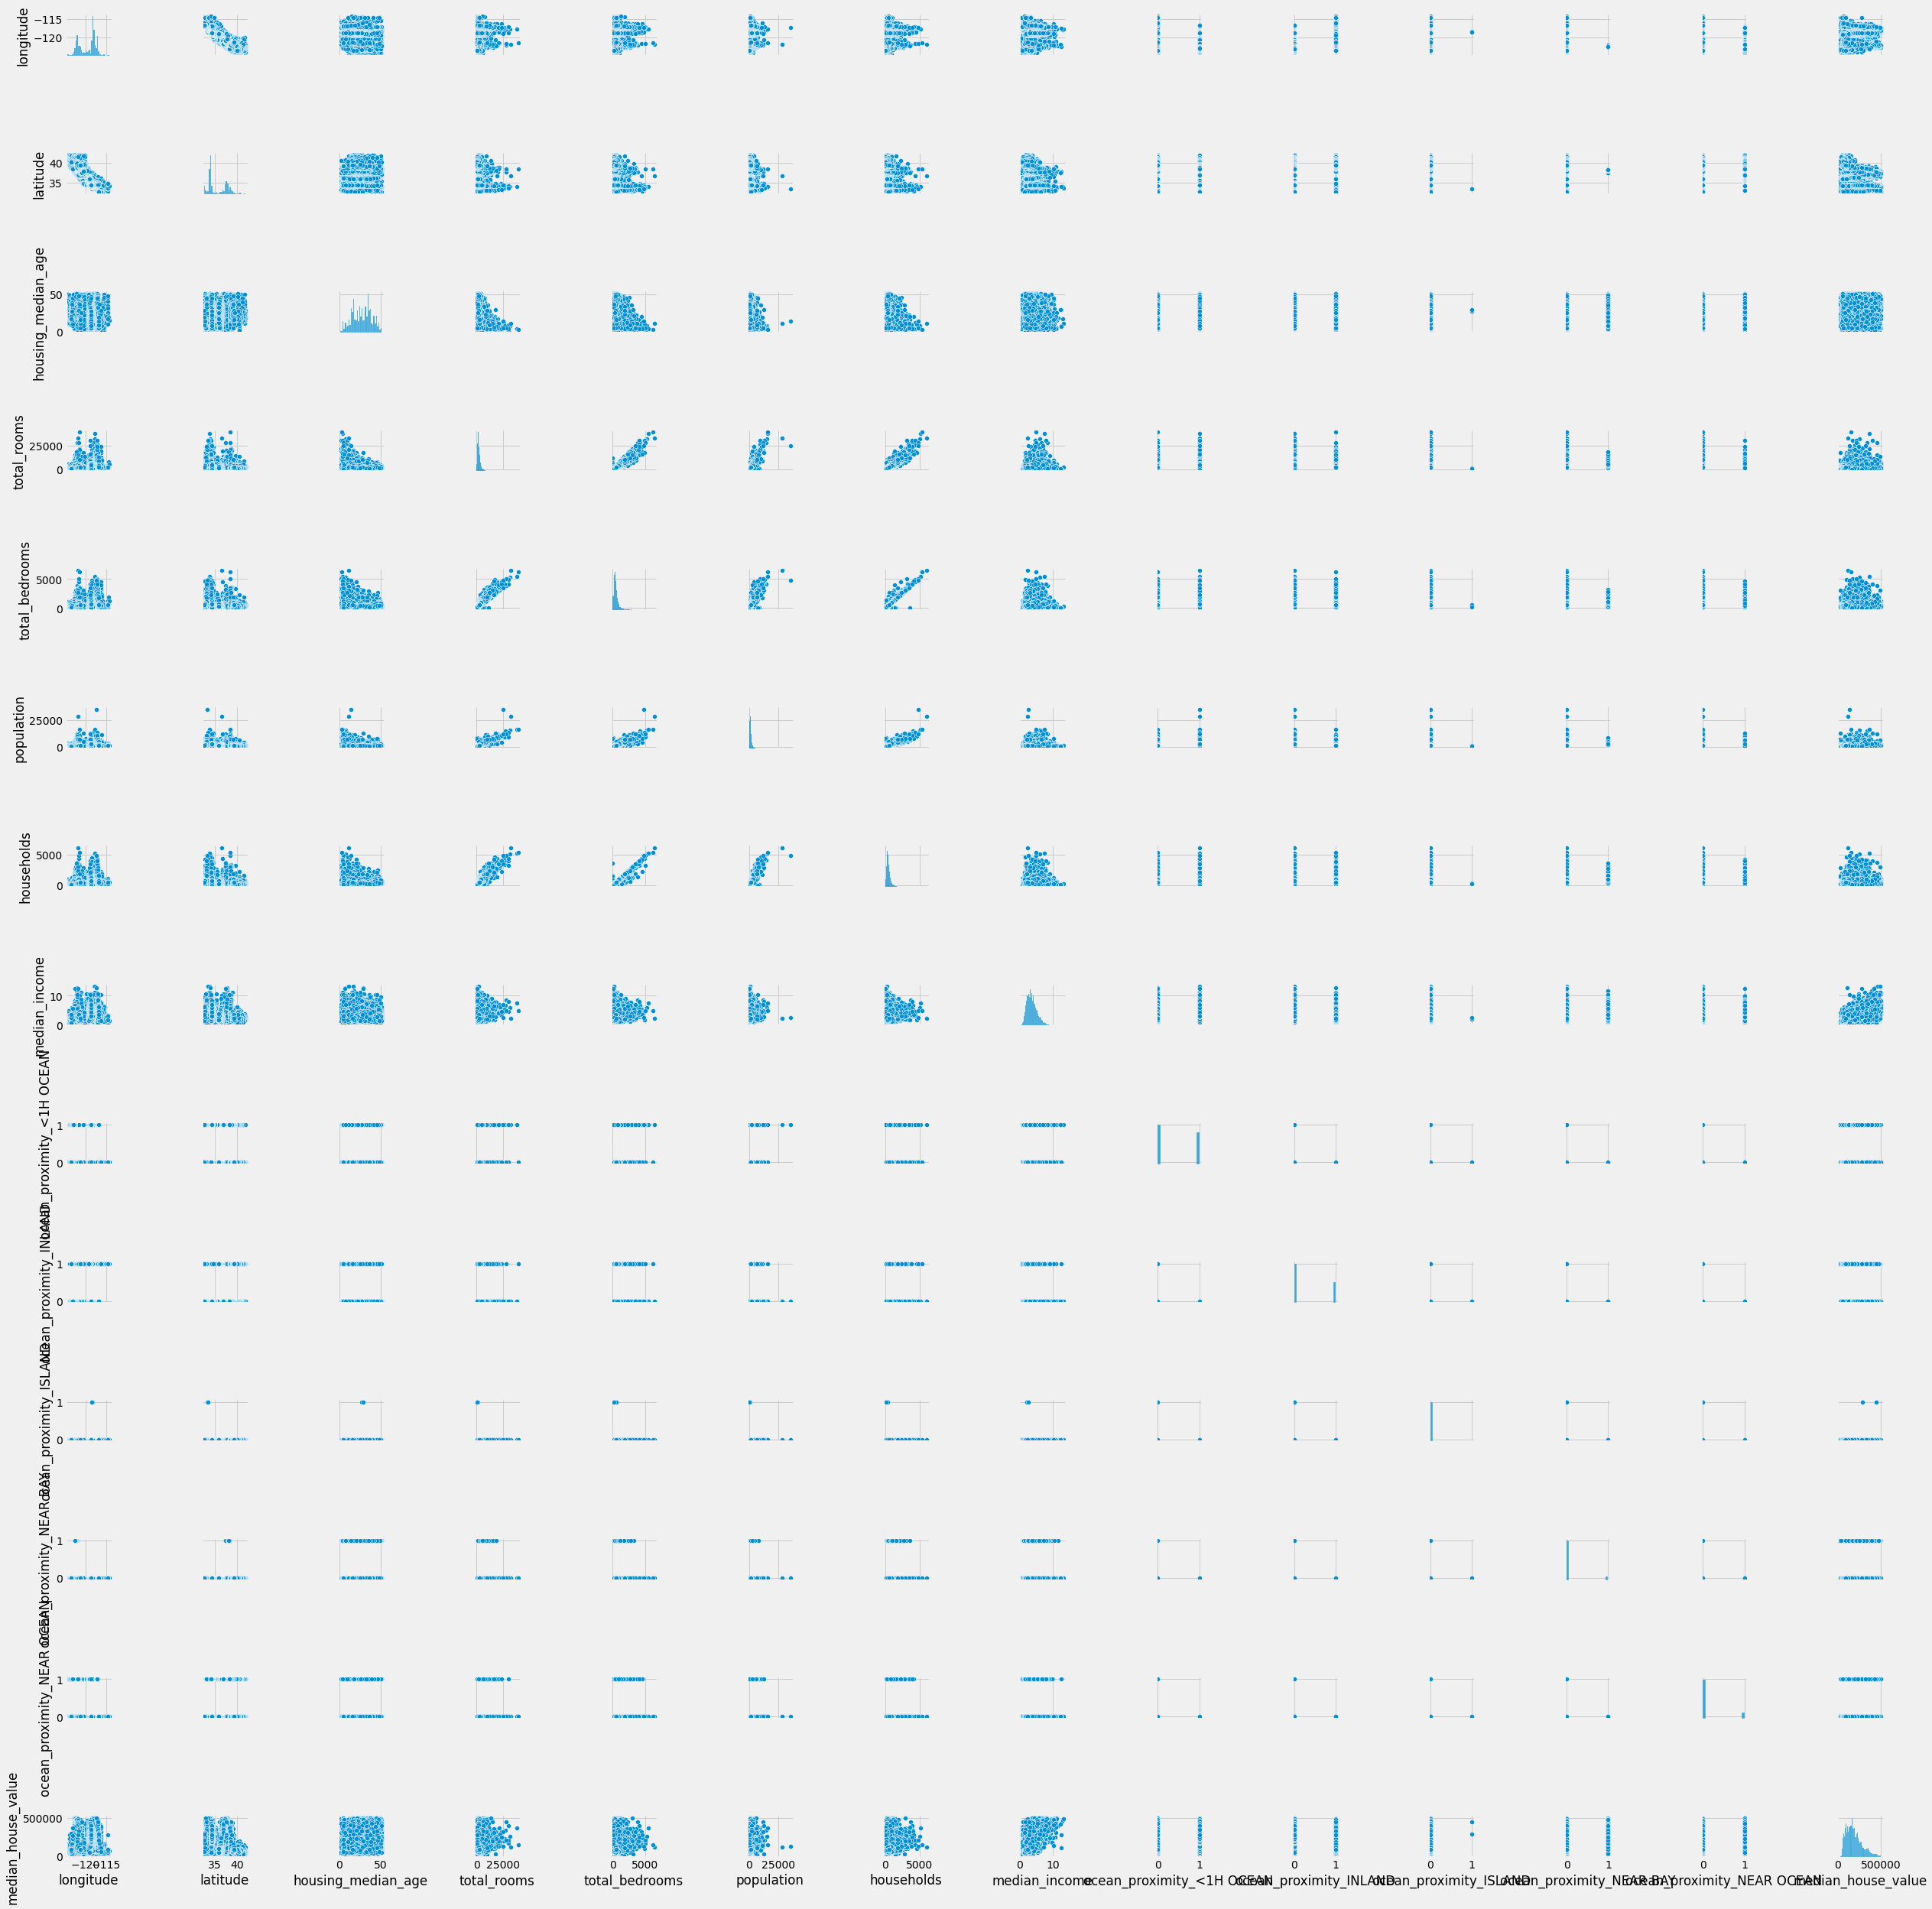

In [29]:
import seaborn as sns
sns.pairplot(data=df1)

So if we look at the bottom row, the plots suggest that there is no real linear relationship between median housing value and any single feature. We can quantify the correlation using .corr() for pearsons correlation value

In [30]:
df1.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
longitude,1.000000,-0.922737,-0.034315,0.035300,0.063958,0.090849,0.050546,-0.015192,0.291141,-0.087919,0.005688,-0.419969,0.041101,-0.022646
latitude,-0.922737,1.000000,-0.051599,-0.027259,-0.063326,-0.107088,-0.070040,-0.076271,-0.431996,0.381791,-0.010654,0.313705,-0.161232,-0.171784
housing_median_age,-0.034315,-0.051599,1.000000,-0.374979,-0.328323,-0.280953,-0.310874,-0.202819,0.107362,-0.221489,0.000924,0.141927,0.036875,0.014335
total_rooms,0.035300,-0.027259,-0.374979,1.000000,0.924968,0.860110,0.921926,0.224910,-0.014156,0.027216,-0.006880,-0.004533,-0.013713,0.154171
total_bedrooms,0.063958,-0.063326,-0.328323,0.924968,1.000000,0.868666,0.965323,0.022470,0.011893,-0.009756,-0.004215,-0.009029,0.003830,0.078449
population,0.090849,-0.107088,-0.280953,0.860110,0.868666,1.000000,0.910674,0.041776,0.071983,-0.036974,-0.007926,-0.038770,-0.022367,0.022811
households,0.050546,-0.070040,-0.310874,0.921926,0.965323,0.910674,1.000000,0.046960,0.039760,-0.046423,-0.006843,0.001489,0.005752,0.100865
median_income,-0.015192,-0.076271,-0.202819,0.224910,0.022470,0.041776,0.046960,1.000000,0.184158,-0.225991,-0.008693,0.061049,-0.003845,0.664827
ocean_proximity_<1H OCEAN,0.291141,-0.431996,0.107362,-0.014156,0.011893,0.071983,0.039760,0.184158,1.000000,-0.649905,-0.009362,-0.273777,-0.341050,0.317047
ocean_proximity_INLAND,-0.087919,0.381791,-0.221489,0.027216,-0.009756,-0.036974,-0.046423,-0.225991,-0.649905,1.000000,-0.007484,-0.218840,-0.272614,-0.501277


Here we see the strongest correlation for median housing value is to median income. But no single feature provides a significant amount of correlation. It is also important to determine wether the features themselves are correlated. Interstingly the # bedrooms, population, and # households are closely correlated. If we want to visualise the correlation between only a few features we can use pandas scatter_matrix plotting function.

In [31]:
from pandas.plotting import scatter_matrix

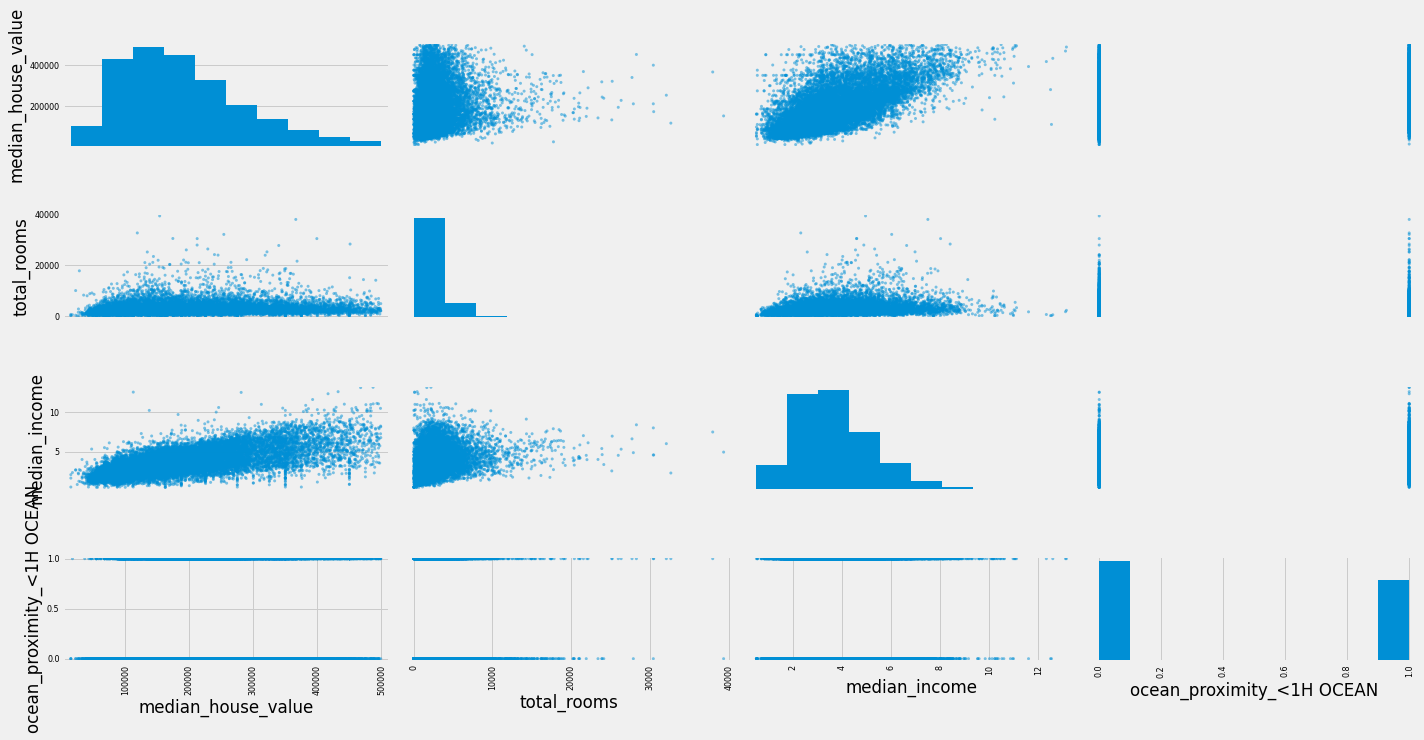

In [32]:
columns = ['median_house_value', 'total_rooms', 'median_income', 'ocean_proximity_<1H OCEAN']
scatter_matrix(df1[columns], figsize=(20, 10))
plt.tight_layout()
plt.show()

Before we train and fit a model we will reupload the data and clean it in a different way. As we saw before, the column total bedrooms is missing values, and ocen_proximity is catergorical. We dealth with categorical features using get_dummies, or one hot encoding, but this created more features, so we can use pandas built in factorize() to leave it as a single column. Also in the future we may expect to see missing values. Our strategy was to fill these values with the median values for each column. But if we kept doing this, it would skew the actual statistic itself. So instead we can fit sklearn's Imputer class to capture whatever stat to use for each feature, in case we need it.  

In [33]:
df1 = pd.read_csv("/content/gdrive/MyDrive/ML Datasets/Kaggle/California_Housing/housing.csv")
df1.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


Again we removed the outlier values as above

In [34]:
df1 = df1[df1["median_house_value"]<500000] 
df1 = df1[df1["median_income"]<15] 
df1 = df1[df1['housing_median_age']<52]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18553 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18553 non-null  float64
 1   latitude            18553 non-null  float64
 2   housing_median_age  18553 non-null  float64
 3   total_rooms         18553 non-null  float64
 4   total_bedrooms      18360 non-null  float64
 5   population          18553 non-null  float64
 6   households          18553 non-null  float64
 7   median_income       18553 non-null  float64
 8   median_house_value  18553 non-null  float64
 9   ocean_proximity     18553 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [35]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

Now remove the categorical column for a second

In [36]:
ocean_prox = df1.pop("ocean_proximity")
ocean_prox.reset_index(drop=True, inplace=True)
ocean_prox

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
18548      INLAND
18549      INLAND
18550      INLAND
18551      INLAND
18552      INLAND
Name: ocean_proximity, Length: 18553, dtype: object

Now we can fit the Imputer instance to the dataframe. Imputer retains the median values in it's statistics_ attribute. So we will also assign that to a variable name for accessing later. Then we will use the imputer strategy (median) to fill any missing values in the columns. This can be done separately by using imputer.fit(df1), then imputer.transform(df1), or in one command by using imputer.fit_transform(df1)

In [37]:
array = imputer.fit_transform(df1)    #must assign to another var name as imputer.tranform does not have an inplace=True arg, also output is a numpy array
median_values = imputer.statistics_
median_values

array([-1.1845e+02,  3.4240e+01,  2.7000e+01,  2.1420e+03,  4.4200e+02,
        1.2040e+03,  4.1600e+02,  3.4643e+00,  1.7100e+05])

Because the transform output is an array we have to reconstruct a dataframe. And then we check it did its job correctly using .info()

In [38]:
df2 = pd.DataFrame(array, columns = df1.columns)    #use the array as dataframe, with the same column headers as the original dataframe
df2.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0


Now we can readd the ocean proximity column and refactor it.

In [39]:
df2 = pd.concat([df2, ocean_prox], axis=1)
df2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
3,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,NEAR BAY
4,-122.26,37.84,50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0,NEAR BAY


Factorise() returns an encoded array of the columns values, and a array of the mapped values for later use.

In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18553 entries, 0 to 18552
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18553 non-null  float64
 1   latitude            18553 non-null  float64
 2   housing_median_age  18553 non-null  float64
 3   total_rooms         18553 non-null  float64
 4   total_bedrooms      18553 non-null  float64
 5   population          18553 non-null  float64
 6   households          18553 non-null  float64
 7   median_income       18553 non-null  float64
 8   median_house_value  18553 non-null  float64
 9   ocean_proximity     18553 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [41]:
ocean_proximity, ocean_prox_mapping = df2['ocean_proximity'].factorize()
ocean_prox_mapping

Index(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'], dtype='object')

replace the column in the dataframe

In [42]:
df2['ocean_proximity'] = ocean_proximity
df2.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0


So now the data is clean. We have the ocean proximity categories in 'ocean_prox_mapping' and the median values for all columns saved as 'median_values'. So now we can separate the target again and think about scaling the feature data. We can think of how sklearns basic scaling works. MinMax scaler scales by normalisation (value-min)/range. StandardScaler works by subtracting the mean value, then dividing by the variance, which doesnt constrain the values between -1 and 1, or 0 and 1, but may sometimes be more important for the analyses. We can examine how they function by creating a dummy series and a few functions that replicate the processes and examine thier output.

In [43]:
 ranger = np.linspace(1, 10, num=10)
 ranger

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [44]:
def minmax(array):
  scaled = []
  min = array.min()
  max = array.max()
  rang = max-min
  for item in array:
    scaled.append((item-min)/rang)
  scaled = np.array(scaled)
  return scaled


In [45]:
scaler = minmax(ranger)
scaler

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [46]:
def standardscale(array):
  scaled = []
  mean = array.mean()
  variance = array.var()
  array = array - mean
  for item in array:
    scaled.append(item/variance)
  scaled = np.array(scaled)
  return scaled

In [47]:
results = standardscale(ranger)
results

array([-0.54545455, -0.42424242, -0.3030303 , -0.18181818, -0.06060606,
        0.06060606,  0.18181818,  0.3030303 ,  0.42424242,  0.54545455])

With sklearn these could be achieved with the following:

In [48]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler1 = MinMaxScaler(feature_range=(0,1))
scaler2 = StandardScaler()

In [49]:
out1 = scaler1.fit_transform(ranger.reshape(-1, 1))
out2 = scaler2.fit_transform(ranger.reshape(-1, 1))

In [50]:
out1 = out1.reshape(1, -1)
out1

array([[0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]])

now prep the data for training using train test split


In [53]:
target = df2.pop("median_house_value")

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(df2, target, test_size=0.2)

Now scale the x data using the MinMax Scaler

In [55]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_train, X_test = scaler.fit_transform(x_train), scaler.fit_transform(x_test)

Now we can import fit and test a model


In [57]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

In [58]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

we can extract the values of the using the models attributes coeff_ and intercept_

In [59]:
y_intercept = regr.intercept_
coefficient = regr.coef_

In [60]:
y_intercept

334674.9059647364

In [61]:
coefficient

array([ -375443.99162029,  -352242.45121464,    36787.07285505,
        -329170.09848745,   458699.79746406, -1088487.09534643,
         364655.5148073 ,   496298.22441357,    -5282.46109566])

So Coef returned an array of values for the coefficients for all features. We can print them out with their respective feature name using .zip()

In [65]:
zipped = zip(df2.columns, coefficient)
print([item for item in zipped])

[('longitude', -375443.99162028614), ('latitude', -352242.4512146416), ('housing_median_age', 36787.07285505145), ('total_rooms', -329170.09848744783), ('total_bedrooms', 458699.7974640573), ('population', -1088487.0953464308), ('households', 364655.5148073018), ('median_income', 496298.2244135733), ('ocean_proximity', -5282.461095661754)]


We can also check the R squared value using score(x, y)

In [66]:
model_score = regr.score(X_train, y_train)
model_score

0.6103479078301681

Now we use the testing data to check the accuracy

In [67]:
y_pred = regr.predict(X_test)
y_pred

array([ 45108.84593306, 240874.72566273,  54695.44792207, ...,
       198160.42806419, 306273.49398892, 143451.44655497])

A useful metric for assessing linear regression is root mean squared error (RMSE). We examine the expected values vs the observed values.

In [69]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

In [70]:
mse

4212963146.2185946

In [71]:
rmse = np.sqrt(mse)
rmse

64907.342775826175

This still means the model of off predicting by almost 65,000 per house.